# Part I - Ford GoBike System Data Exploration
## by Seyma Alan

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
print(df.shape)
print(df.dtypes)
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [6]:
#Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender have some missing values. I'll drop whole null rows.

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [9]:
# First change data types to correct ones
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)
df.member_birth_year = df.member_birth_year.astype(int)
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [10]:
# Convert bike sharing to boolean value
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [11]:
df.bike_share_for_all_trip.value_counts()

False    157606
True      17346
Name: bike_share_for_all_trip, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(4), int64(2), object(7)
memor

In [13]:
# load cleaned table to a csv for simplicity
df.to_csv('enhanced_fordgobike.csv')

### What is the structure of your dataset?

There were 183412 fordgobike trips in the dataset with 16 columns. However, I dropped null values. Therefore, enhanced and cleaned dataset contains 174952 entries with 16 columns.

Columns are:
1. duration_sec: Numeric (int)
2. start_time : Datatime
3. end_time : Datatime
4. start_station_id : Object 
5. start_station_name : Object
6. start_station_latitude : Numeric (float)
7. start_station_longitude : Numeric (float)
8. end_station_id : Object
9. end_station_name : Object
10. end_station_latitude : Numeric (float)
11. end_station_longitude : Numeric (float)
12. bike_id: Object
13. user_type: Object
14. member_birth_year: Numeric (int)
15. member_gender: Object
16. bike_share_for_all_trip: Boolean

### What is/are the main feature(s) of interest in your dataset?

I am mainly interested duration of bike sharing.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think, trip duration is dependent on distance between start and end stations. Moreover, user type, member age and member gender might affect trip duration. 

## Univariate Exploration


I'll start by looking at the distribution of the main variable of interest: duration.

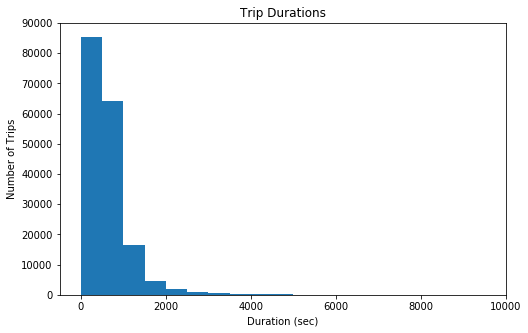

In [14]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()

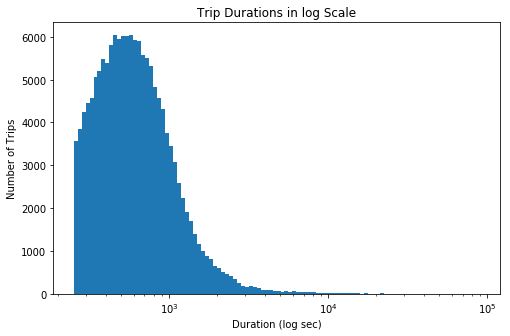

In [15]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.title('Trip Durations in log Scale')
plt.xlabel('Duration (log sec)')
plt.ylabel('Number of Trips')
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


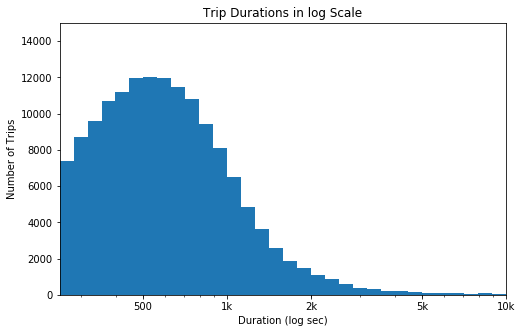

In [16]:
# bins are quite small let me change them
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.title('Trip Durations in log Scale')
plt.xlabel('Duration (log sec)')
plt.ylabel('Number of Trips')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

Duration is accumulated on the left side. In other words, values are focused on lower side. Most of the values are less than 2000 seconds. There is a peak around 600 seconds. Duration values first increases starting from around 8000 values at 0 to 12500 values at around 600 but then starts to fall. It goes below 2000 values at 2000 sec.

Let's look start and end station id relation.

In [17]:
print(df['start_station_id'].astype(float).max())
print(df['end_station_id'].astype(float).max())

398.0
398.0


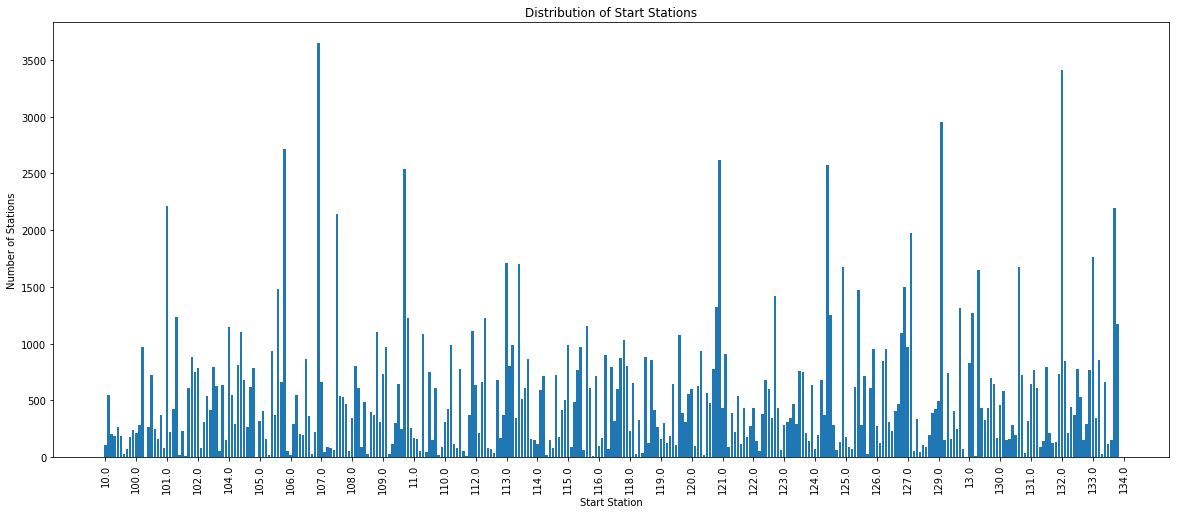

In [44]:
# Plotting start station id
plt.figure(figsize=[20, 8])
plt.xticks(range(0, 340, 10), rotation = 90)
x = df['start_station_id'].unique()
y = df['start_station_id'].value_counts(sort=False)
plt.bar(x, y)
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.show()

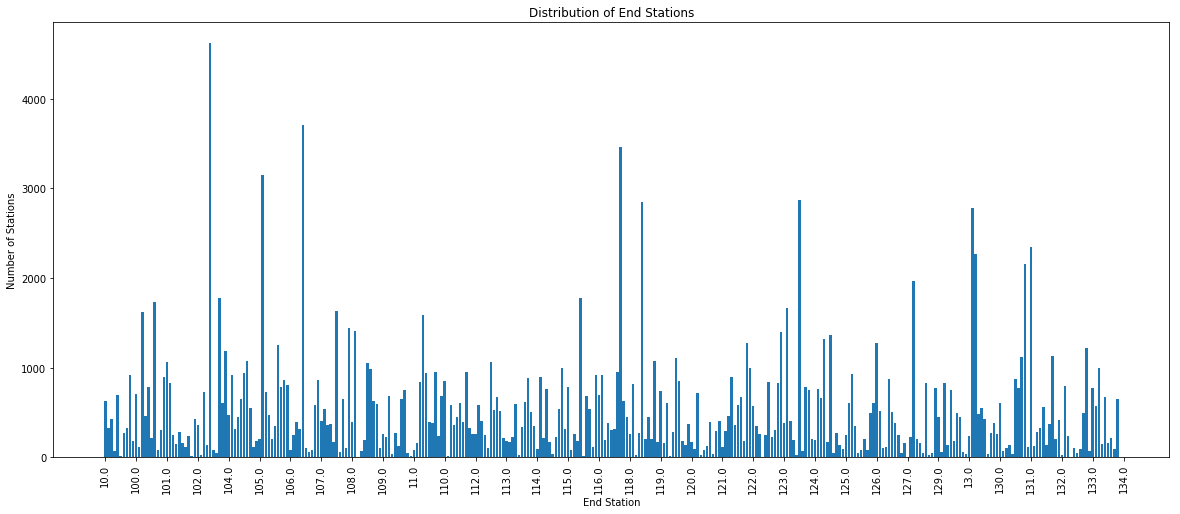

In [42]:
# Plotting end station id
plt.figure(figsize=[20, 8])
plt.xticks(range(0, 340, 10), rotation = 90)
x = df['end_station_id'].unique()
y = df['end_station_id'].value_counts(sort=False)
plt.bar(x, y)
plt.title('Distribution of End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.show()

Interestingly these two plots are kind of resemble each other. Especially their peak values are close each others. Their distribution might show us some stations are much busier than others.

Let's move on other variables.

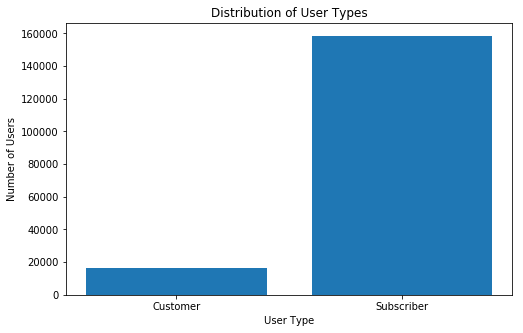

In [52]:
# Plotting types of users
plt.figure(figsize=[8,5])
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts() )
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('Distribution of User Types')
plt.show()

The majority of users are subscribers, nearly 90% of users.

In [53]:
print(df['member_birth_year'].max())
print(df['member_birth_year'].min())

2001
1878


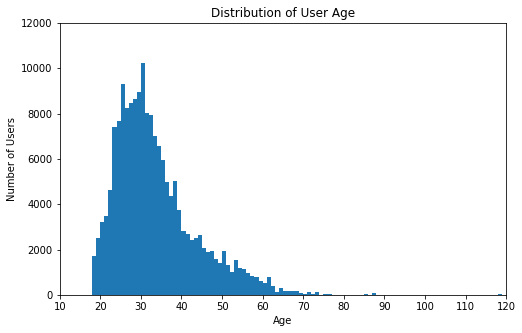

In [20]:
# Plotting age distribution based on birth year
bins = np.arange(0, 2002, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_birth_year', bins = bins)
plt.axis([1909, 2009, 0, 12000])
plt.xticks([1899,1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1899),(2019-1909),(2019-1919),(2019-1929),(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

Age distribution makes a peak around 30 ages. We can see that our data mostly concentrated around 20-40 ages.

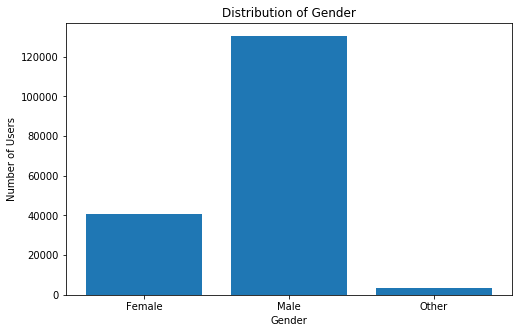

In [55]:
# Plotting genders
plt.figure(figsize=[8,5])
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts())
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

The majority of users are male.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The trip duration has a tail distribution, mostly concentrated on lower values. However, duration variable takes on a large range of values, so I looked at the data using a log transform. I found that duration values first increases starting from 0 to 12500 values and makes a peak around 600 but then starts to fall.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Birth year was converted to age by substracting the year from 2019. To understand trip duration dependency on age better, we had to make this transformation. Also there are some outliers in the age dataset such us a person who was born in 1878. Since it is kind of impossible a person who was born in 1878 and ride a bike, I excluded ages after 120 in the plot.

## Bivariate Exploration


Firstly investigate the relation between age and duration.

In [56]:
print(df['duration_sec'].min())
print(df['duration_sec'].max())

61
84548


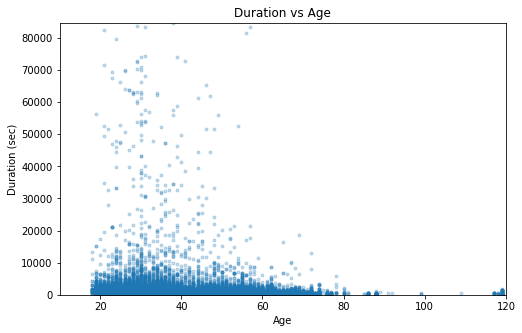

In [57]:
# Plotting age and duration relation
plt.figure(figsize=[8,5])
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([10, 120, 61, 84548])
plt.title('Duration vs Age')
plt.xlabel('Age')
plt.ylabel('Duration (sec)')
plt.show()

There is an intense density between 0-10000. To better investigation, let's exclude duration values beyond 15000.

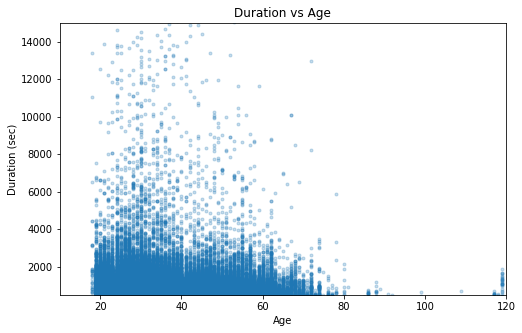

In [58]:
# Plotting age and duration relation
plt.figure(figsize=[8,5])
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([10, 120, 500, 15000])
plt.title('Duration vs Age')
plt.xlabel('Age')
plt.ylabel('Duration (sec)')
plt.show()

We can dive deeper: Most of the values are between 500 - 8000 range. Let's see their density:

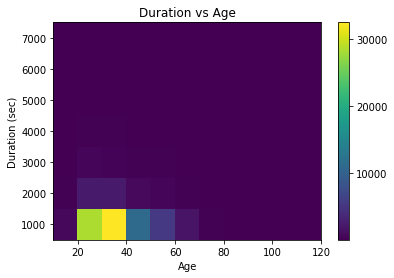

In [59]:
# Plotting age and duration relation density
bins_y = np.arange(500, 8001, 1000)
bins_x = np.arange(10, 121, 10)
plt.hist2d((2019 - df['member_birth_year']), df['duration_sec'], bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000,50000]);
plt.title('Duration vs Age')
plt.xlabel('Age')
plt.ylabel('Duration (sec)')
plt.show()

The most frequent users are 20-40 years old.

Now, look at the relation between starting station id and duration.

In [74]:
# Creating a new dataframe to get the summation of duration values for each starting station id
comb_mean = df.groupby(by=['start_station_id']).sum().reset_index()
comb_mean.start_station_id = comb_mean.start_station_id.astype(float)
comb_mean.sort_values(by=['start_station_id'], inplace = True)
comb_mean

,start_station_id,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,bike_share_for_all_trip
202,3.0,2240221,99000.303204,-320700.849438,98982.644757,-320705.890654,5201505,148.0
273,4.0,532116,20971.163748,-67936.947830,20967.989900,-67936.308074,1100838,51.0
281,5.0,1773766,81008.680222,-262443.705826,80994.616094,-262446.273170,4255739,203.0
291,6.0,1808129,74664.420750,-241746.387150,74631.713756,-241739.604814,3917826,25.0
299,7.0,505307,30205.845322,-97695.118704,30210.770712,-97691.360765,1584416,122.0
310,8.0,541725,23020.171377,-74540.701725,23012.292885,-74541.181488,1207973,28.0
319,9.0,599895,33224.944883,-107590.363835,33211.366479,-107588.567485,1742727,15.0
0,10.0,824833,27666.227630,-89600.291827,27657.948859,-89599.945749,1453132,123.0
10,11.0,631040,35491.645920,-114932.131404,35482.273283,-114934.163411,1862686,22.0
28,13.0,574185,27060.669396,-87640.492868,27052.839087,-87640.818639,1419084,36.0


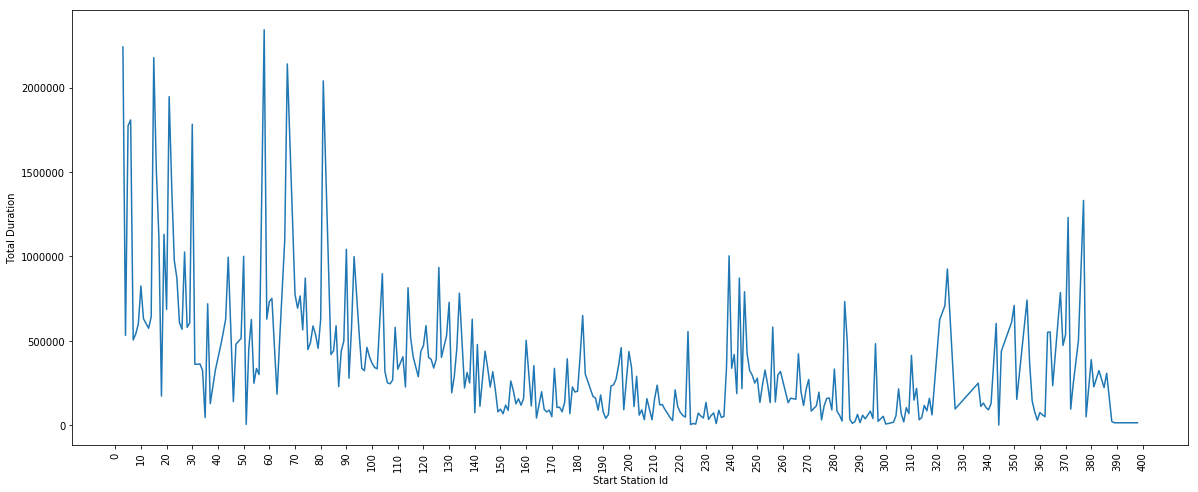

In [77]:
# Plotting start station id vs total duration relation with line plot
plt.figure(figsize = [20, 8])
plt.errorbar(x=comb_mean['start_station_id'], y=comb_mean['duration_sec'])
plt.xticks(range(0, 410, 10), rotation = 90)
plt.title('Total Durations on Start Stations')
plt.xlabel('Start Station Id')
plt.ylabel('Total Duration')
plt.show()

Let's also take a look at for end stations.

In [78]:
# Creating a new dataframe to get the summation of duration values for each ending station id
comb_mean2 = df.groupby(by=['end_station_id']).sum().reset_index()
comb_mean2.end_station_id = comb_mean2.end_station_id.astype(float)
comb_mean2.sort_values(by=['end_station_id'], inplace = True)
comb_mean2

,end_station_id,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,bike_share_for_all_trip
202,3.0,2076496,107819.431658,-349359.453506,107842.315017,-349343.597059,5666491,130.0
273,4.0,492882,21383.104608,-69282.628974,21386.808435,-69283.445895,1122656,51.0
281,5.0,1603834,81336.091619,-263544.473091,81348.735316,-263545.381830,4272651,200.0
291,6.0,2239249,88459.453920,-286539.793291,88500.966570,-286545.970794,4645614,47.0
299,7.0,452348,28623.903649,-92556.227959,28618.053703,-92559.705706,1501229,119.0
310,8.0,688226,25353.550382,-82129.035554,25363.768463,-82129.410275,1331423,15.0
319,9.0,604052,28979.430252,-93881.061431,28991.504807,-93881.466509,1521478,4.0
0,10.0,835820,32871.860633,-106491.404514,32881.991855,-106492.150122,1726229,146.0
10,11.0,759935,35821.143589,-116036.004626,35831.821440,-116033.717328,1879518,22.0
28,13.0,651507,27695.639998,-89722.356924,27703.171323,-89721.342559,1453250,34.0


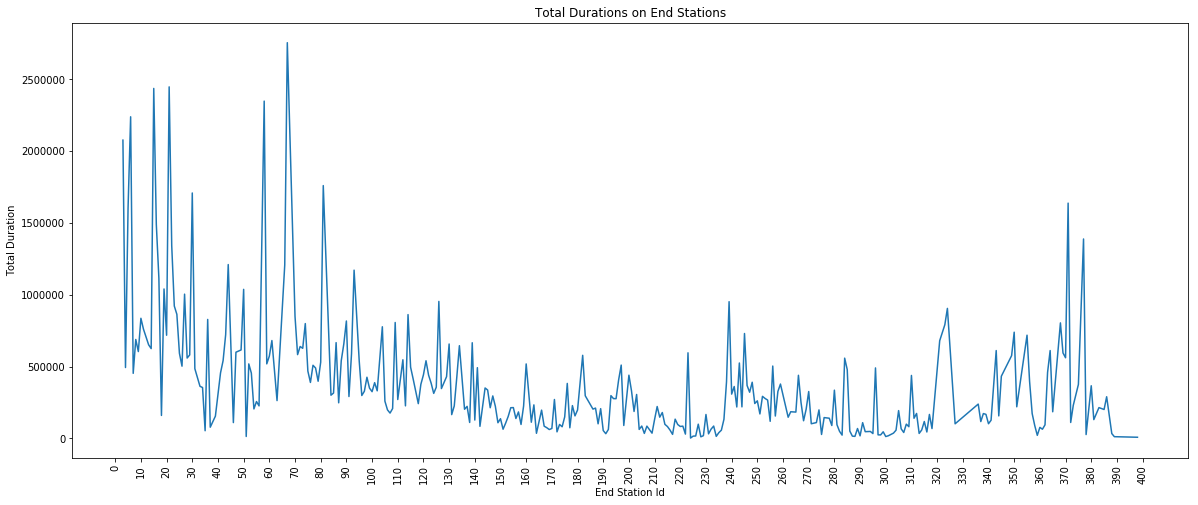

In [79]:
# Plotting end station id vs total duration relation with line plot
plt.figure(figsize = [20, 8])
plt.errorbar(x=comb_mean2['end_station_id'], y=comb_mean2['duration_sec'])
plt.xticks(range(0, 410, 10), rotation = 90)
plt.title('Total Durations on End Stations')
plt.xlabel('End Station Id')
plt.ylabel('Total Duration')
plt.show()

These two plots show us some stations have higher duration values as start station and some of them as end station. We can decide that which stations result in starting of longer trips and which stations used as end of longer trips.

Let's take a look at the dependency of durations on user types

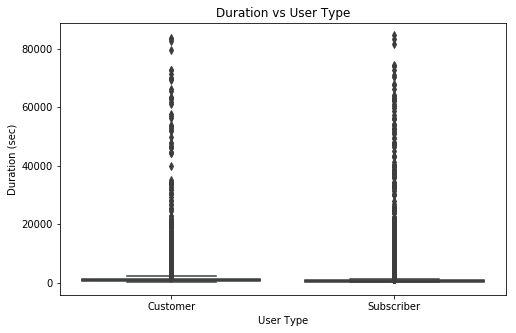

In [88]:
# Plotting user type - duration relation with box plot
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[2]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.title('Duration vs User Type')
plt.show()

Since y values are really high, we could not see any clear picture. Let's look from closer, i.e. cut y values.

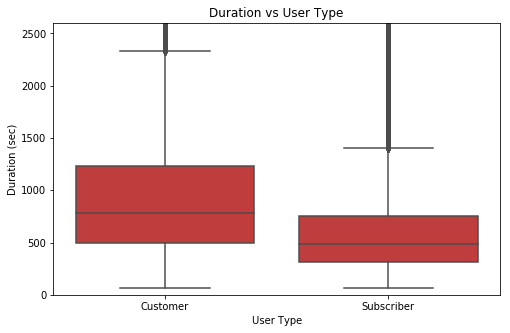

In [92]:
# Plotting user type - duration relation with truncated y - values
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[3]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([0, 2600])
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.title('Duration vs User Type')
plt.show()

We can see that higher percentage of customers takes longer trips then subscribers.

Also look at the gender - duration relation.

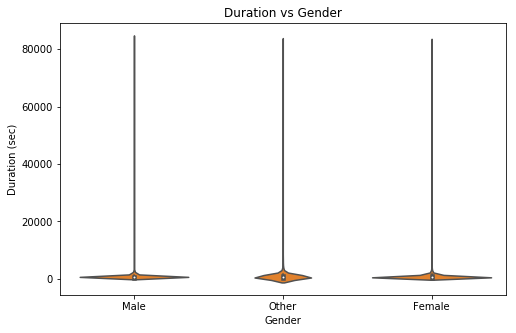

In [93]:
# Plotting gender - duration relation with a violin plot
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.violinplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.title('Duration vs Gender')
plt.show()

Again y values are pretty high. Let's truncate them.

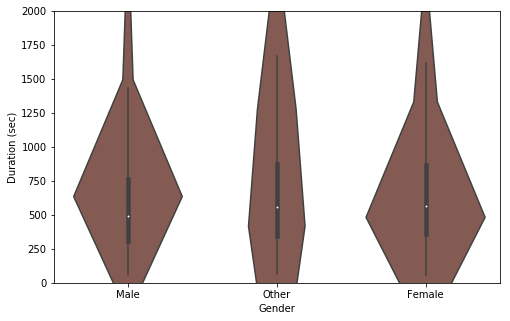

In [96]:
# Plotting gender - duration relation with truncated y-values
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[5]
sb.violinplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([0, 2000])
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.show()

Higher portion of female and other gender share bikes for longer duration then males.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is a strong dependance of duration on ages. The biggest portion of trip durations comes from 20 - 40 ages users. Some starting stations are having higher trip durations as starting point and some end stations are having higher trip durations as ending point. This does not show us any specific dependence. Higher portion of female and other gender share bikes for longer duration then males. Also, we saw that higher percentage of customers takes longer trips then subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Starting/Ending station vs duration plots do not show us any specific dependence. However, created starting and ending plots are kind of similar each other. There might be another relation among them, we can analyze them in coming parts. 

## Multivariate Exploration


Let me firstly investigate the relation between start station, end station and duration that I have mentioned before.

In [ ]:
# Creating a new dataframe to get the summation of duration values for each starting station id
comb_mean = df.groupby(by=['start_station_id']).sum().reset_index()
comb_mean.start_station_id = comb_mean.start_station_id.astype(float)
comb_mean.sort_values(by=['start_station_id'], inplace = True)

# Creating a new dataframe to get the summation of duration values for each ending station id
comb_mean2 = df.groupby(by=['end_station_id']).sum().reset_index()
comb_mean2.end_station_id = comb_mean2.end_station_id.astype(float)
comb_mean2.sort_values(by=['end_station_id'], inplace = True)

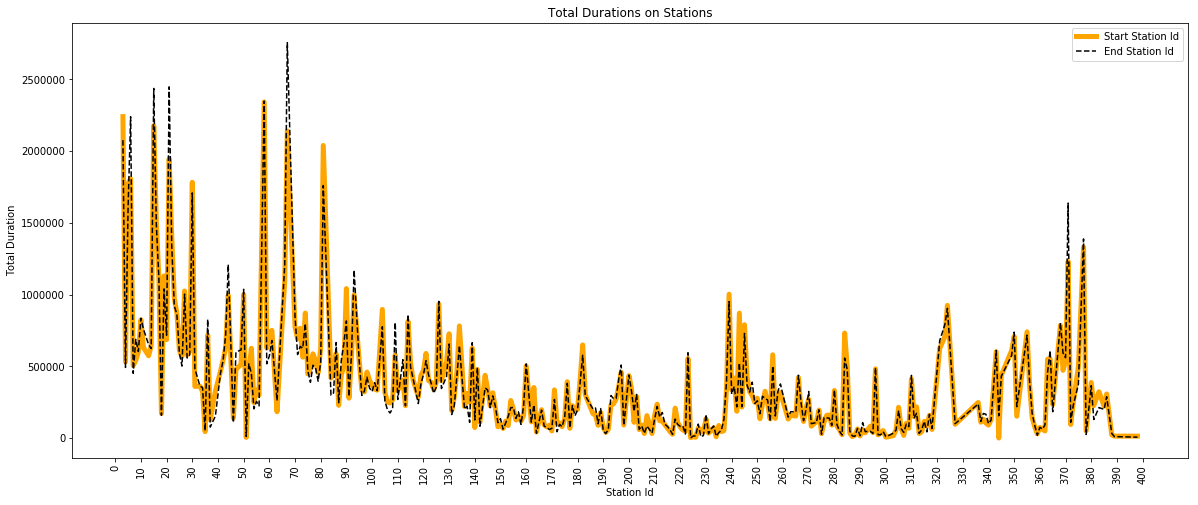

In [109]:
# Plotting start station id, end station id vs total duration relation with line plot
plt.figure(figsize = [20, 8])
plt.errorbar(x=comb_mean['start_station_id'], y=comb_mean['duration_sec'], label ='Start Station Id', linewidth=5, color="orange")
plt.errorbar(x=comb_mean2['end_station_id'], y=comb_mean2['duration_sec'], label ='End Station Id', linestyle = '--', color="black")
plt.xticks(range(0, 410, 10), rotation = 90)
plt.title('Total Durations on Stations')
plt.xlabel('Station Id')
plt.ylabel('Total Duration')
plt.legend(loc ='upper right')
plt.show()

As I suggested before, there is a relation between specific stations and trip duration. It seems like stations tend to have similar trip durations as start and end stations. This suggests us stations may have some popularity.

Let's also measure the role of gender and age in trip duration.

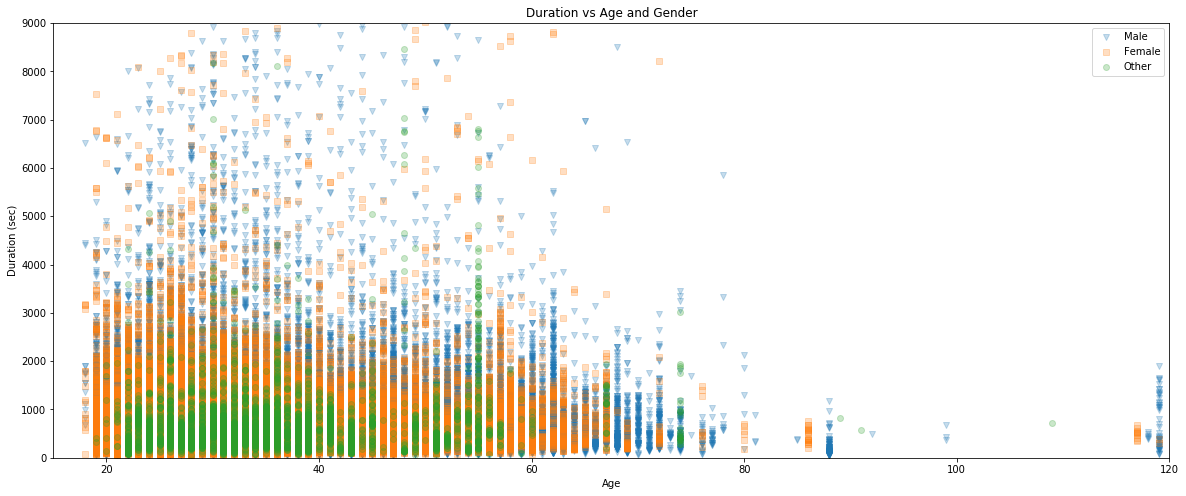

In [22]:
# Plotting gender, age and duration relation
genderlist = [['Male', 'v'],['Female', 's'],['Other', 'o']]
plt.figure(figsize = [20, 8])
for gender, marker in genderlist:
    df_gender = df[df['member_gender'] == gender]
    plt.scatter((2019 - df_gender['member_birth_year']), df_gender['duration_sec'], marker = marker, alpha=0.25)
plt.legend(['Male','Female','Other'])
plt.axis([15, 120, 0, 9000 ])
plt.xlabel('Age')
plt.ylabel('Duration (sec)')
plt.title('Duration vs Age and Gender')
plt.show()

We created a pretty dense and messy plot. Let's separe them.

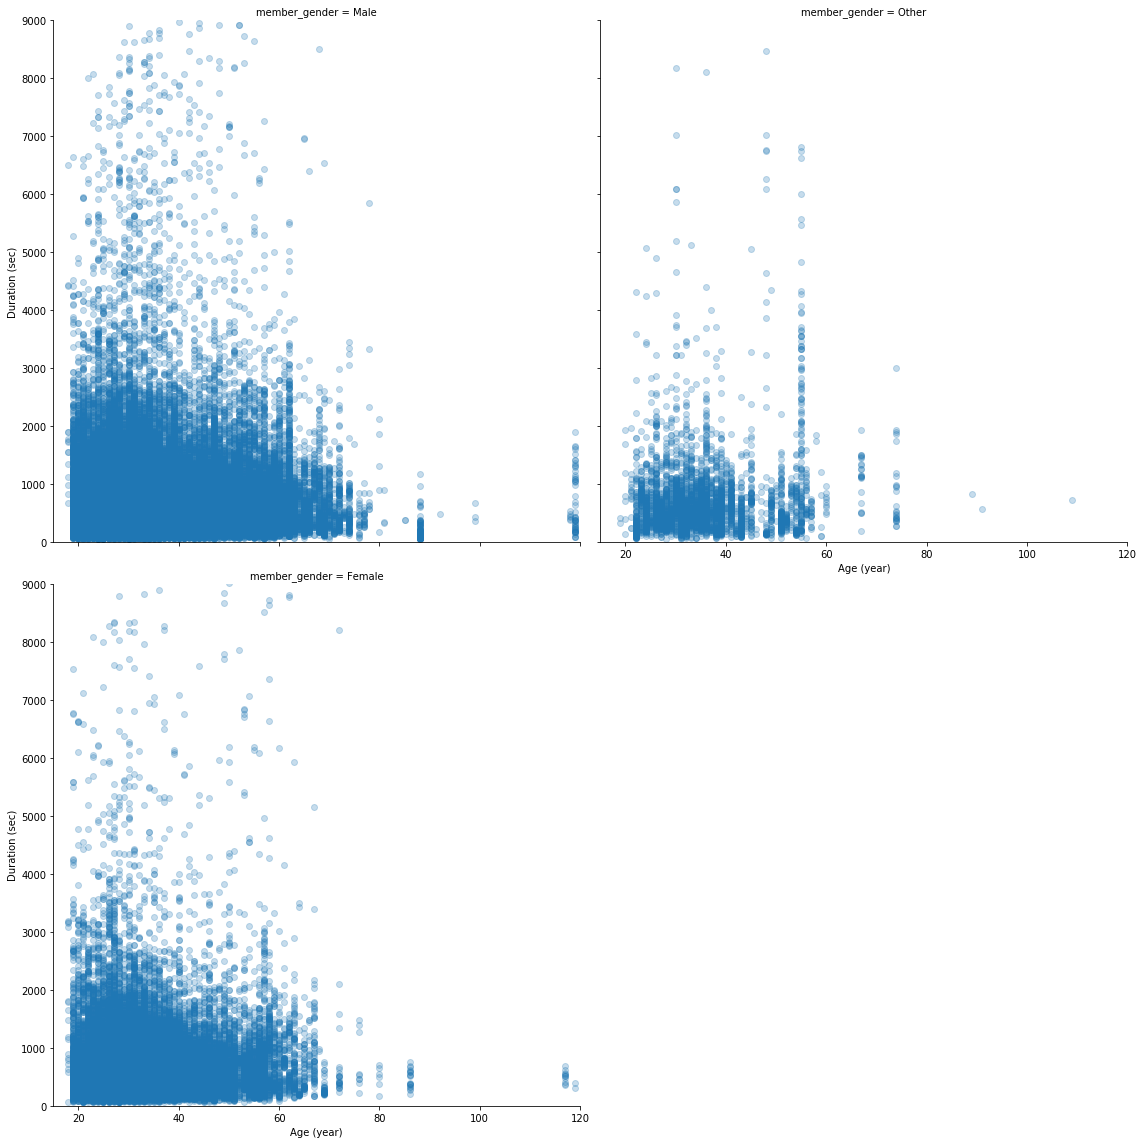

In [23]:
# Faceting gender, age and duration relation
df['age'] = (2019 - df['member_birth_year'])
g = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, size = 8, xlim = [15, 120], ylim = [0, 9000])
g.map(plt.scatter, 'age' , 'duration_sec', alpha=0.25)
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (sec)')
plt.show()

Males have more outliers, i.e. age > 120, and more trip durations than other genders and females. All of genders have the highest duration values mostly below 70 ages.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Drawing separate lines for start stations and end stations in the same figure, we saw that there is a common popularity among stations for starting and ending case. We observed that the duration trip is higher for male but percentage is higher for women and other genders. Also we stated that all of genders have the highest duration values mostly below 70 ages.

### Were there any interesting or surprising interactions between features?

Although I was expecting the favored starting and ending stations to be same, observing nearly same behavior, i.e. peaks, falls and waves on the same station values were mostly similar, was surprisng for me. 

## Conclusions

Firstly, I cleaned the dataset for a better visualization process. After choosing the main interest as trip duration, we started univariate exploration. <br>
We saw that most of the trip durations are less than 2000 seconds, with a peak around 600 seconds. Duration values first increases starting from around 8000 values at 0 to 12500 values at around 600 but then starts to fall. It goes below 2000 values at 2000 sec. Also we plotted the start station and end station value counts. Interestingly these two plots were kind of resemble each other. Their distribution might show us some stations are much busier than others. Then, we plotted for age, gender and user type distributions. The majority of users were subscribers and males. Age distribution made a peak around 30 ages. We pointed that our data mostly concentrated around 20-40 ages. <br>
We moved to bivariate exploration. First of all, we investigated the relation between age and duration. Using a heat map, we stated that the users with ages 20-40 builds the majority of our consumers. Secondly, we checked start stations' and end stations' effect on durations. Plots showed us some stations have higher duration values as start station and some of them as end station. Start station and end station plots made peaks around similar station numbers. Thirdly, we investigated the user types and genders via box plot and violin plot. Our investigation resulted as higher portion of female and other gender share bikes for longer duration then males. Also, higher percentage of customers takes longer trips then subscribers. <br>
Lastly we did some multivariate explorations. We drew start station, end station and total duration line plot to see whether there is a correlation between these values. Start stations and end stations acted resemble showing us some popularity on some stations. Then we also looked for the relation between age, gender and duration relation. At the beginning, we tried plotting whole data in a one plot. However, we obtained a messy plot. Therefore, we used faced grids and clearly analzyed gender-age-duration relation. We observed that males have more outliers, i.e. age > 120, and more trip durations than other genders and females. All of genders have the highest duration values mostly below 70 ages.

In [45]:
!jupyter nbconvert --to html Part_I_notebook.ipynb

[NbConvertApp] Converting notebook Part_I_notebook.ipynb to html
[NbConvertApp] Writing 1640978 bytes to Part_I_notebook.html
